## Colab에서 수행하기
https://colab.research.google.com/github/cheonhae/2024_KPC_DA_02/blob/master/Day1_subway_passenger.ipynb

# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

In [1]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법

# 1. 먼저 폰트를 설치합니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 폰트 캐시를 재구성합니다.
import matplotlib.font_manager as fm
fm.FontManager()

# 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,748 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123599 files and dire

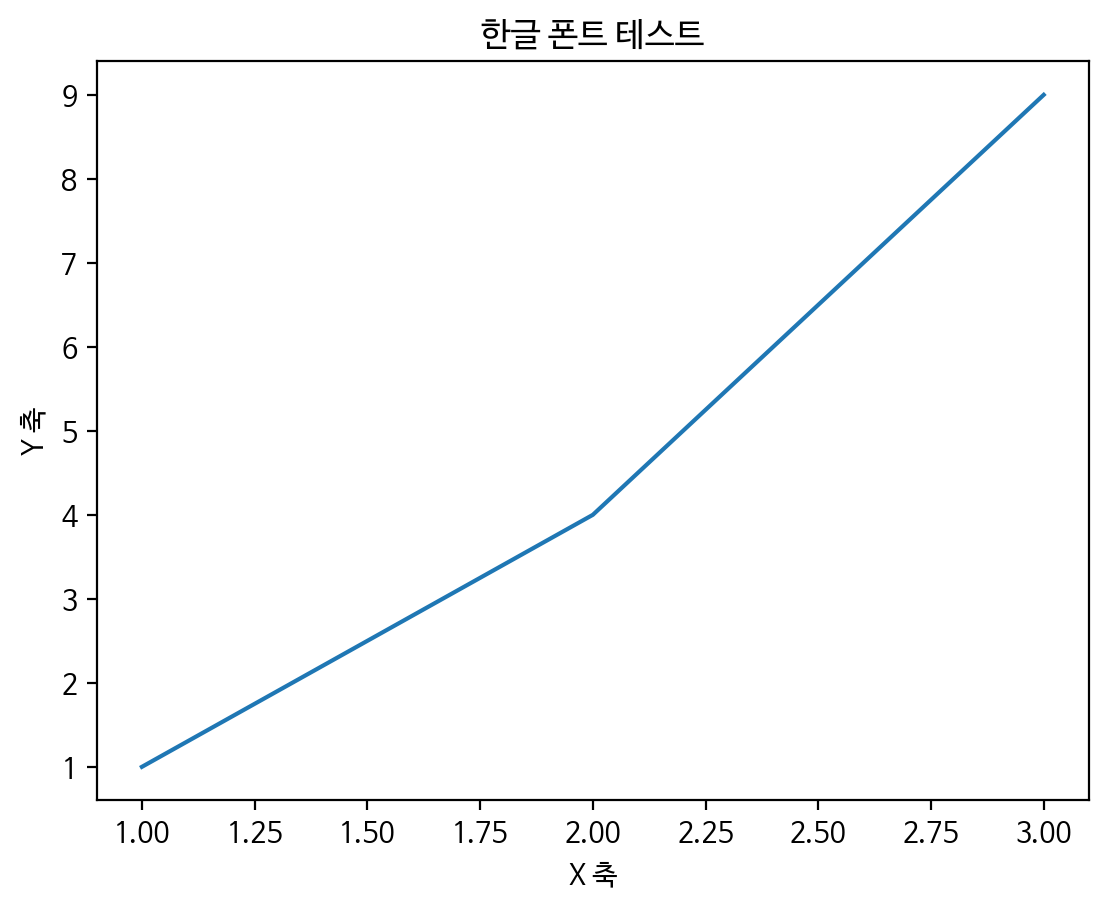

In [1]:
# 3. 이제 matplotlib를 임포트합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl

# 4. 폰트를 설정합니다.
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
# 5. Retina 디스플레이를 위한 설정 (선택 사항)
%config InlineBackend.figure_format = 'retina'

# 6. 한글 폰트가 적용되었는지 확인하기 위한 예제 플롯
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3], [1, 4, 9])
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()


# **지하철 탑승객 분석**
- 파일 읽기
- 데이터 보이기
- 노선별 집계 및 그래프
- 사용일자 별 집계 및 그래프

## 1.주요 라이브러리 읽어들이기

In [2]:
# 데이터 분석을 위해 필요한 프로그램이 정의된 라이브러리 모듈을 읽어들입니다.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2.파일 읽고 데이터 보이기

In [3]:
# 데이터를 읽어 들여서 출력해 봅니다.
filepath = 'https://raw.githubusercontent.com/cheonhae/2024_KPC_DA_02/refs/heads/master/CARD_SUBWAY_MONTH_202102.csv'
subway = pd.read_csv(filepath,
                     engine = "python", index_col = False,
                    parse_dates=['사용일자', '등록일자'])
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2021-02-01,중앙선,용문,1282,1259,2021-02-04
1,2021-02-01,중앙선,지평,48,43,2021-02-04
2,2021-02-01,중앙선,아신,415,413,2021-02-04
3,2021-02-01,중앙선,양수,1463,1466,2021-02-04
4,2021-02-01,중앙선,운길산,495,463,2021-02-04
...,...,...,...,...,...,...
16746,2021-02-28,중앙선,오빈,216,236,2021-03-03
16747,2021-02-28,중앙선,양평,3299,3187,2021-03-03
16748,2021-02-28,중앙선,원덕,322,304,2021-03-03
16749,2021-02-28,중앙선,용문,1899,1716,2021-03-03


In [4]:
subway.to_csv('CARD_SUBWAY_MONTH_202102.csv', index=False)

## 3.노선별 집계 및 그래프

In [5]:
# 노선별 집계하고 그래프를 그려봅니다.
line_sum = subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['노선명'], aggfunc='sum')
line_sum

,승차총승객수,하차총승객수
노선명,,
1호선,4679191,4542729
2호선,28361914,28569248
3호선,10835360,10815356
4호선,10074811,10158195
5호선,13021347,12950928
6호선,6831414,6732553
7호선,14581263,14366013
8호선,3977672,4010501
9호선,5677271,5772797


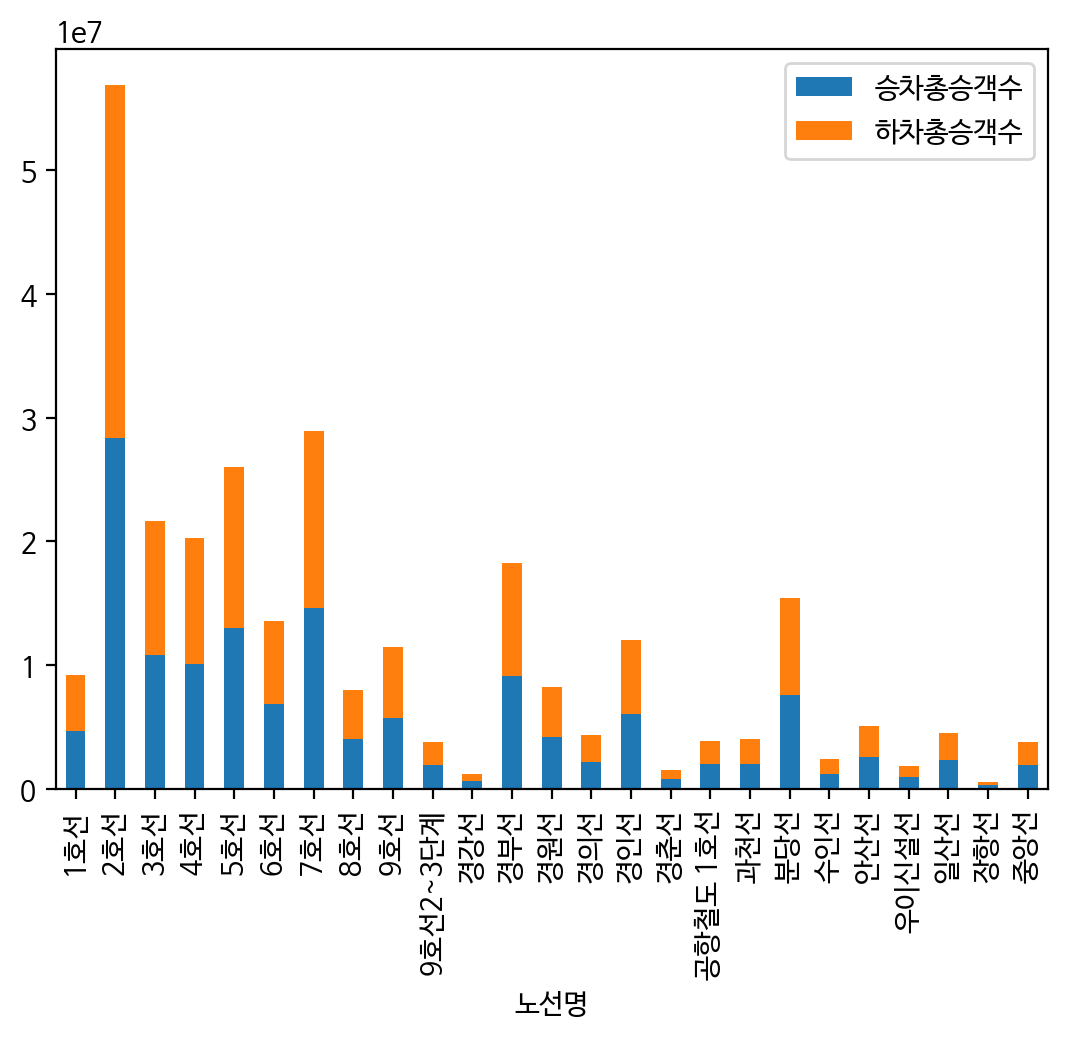

In [6]:
subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['노선명'], aggfunc='sum').plot(kind = 'bar', stacked = True);

## 4.사용일자별 집계 및 그래프

In [7]:
# 사용일자별 탑승자수 집계 및 그래프
day_sum = subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['사용일자'], aggfunc='sum')
day_sum


,승차총승객수,하차총승객수
사용일자,,
2021-02-01,5985793,5966469
2021-02-02,5964361,5944384
2021-02-03,6226946,6204360
2021-02-04,6194223,6178411
2021-02-05,6304945,6287035
2021-02-06,3978787,3962840
2021-02-07,2766063,2752136
2021-02-08,6158652,6140916
2021-02-09,6232265,6214382


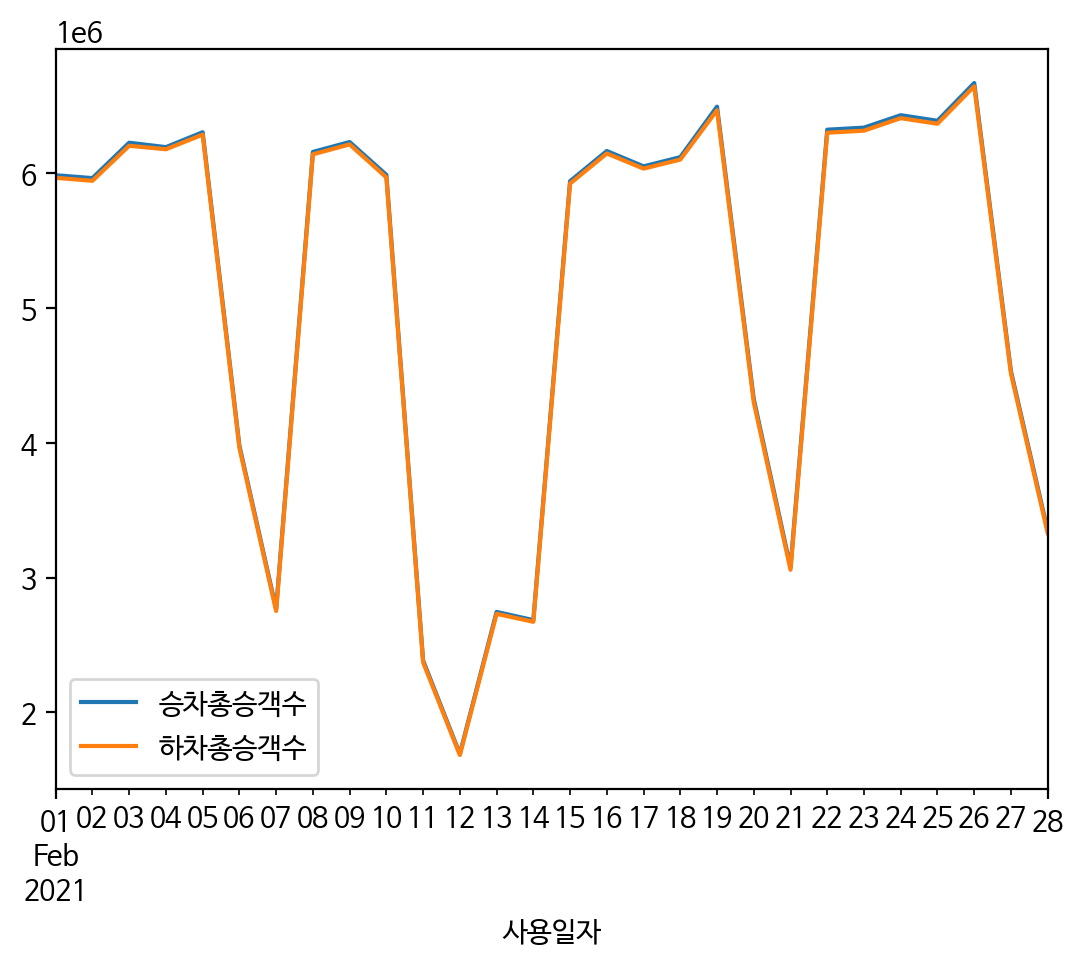

In [8]:
subway.pivot_table(values = ['승차총승객수','하차총승객수'], index = ['사용일자'], aggfunc='sum').plot(kind = 'line');